## MNIST Classifier for Digits
MNIST is a dataset which has items of handwriting -- the digits 0 through 9.

In this notebook we are training an MNIST classifier using two neural networks.
1. Shallow Neural Network(Normal NN).
2. Convolutional Neural Network(CNN).

MNIST dataset is included in tensorflow keras datasets, we are directly using that dataset here.


In normal NN, we are training a model that trains to 99% accuracy or above, and does it without a fixed number of epochs.

In [1]:
import tensorflow as tf
from os import path, getcwd, chdir

path = r"C:\Users\ASUS\Downloads\MNIST\mnist.npz"

In [2]:
path

'C:\\Users\\ASUS\\Downloads\\MNIST\\mnist.npz'

In [3]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

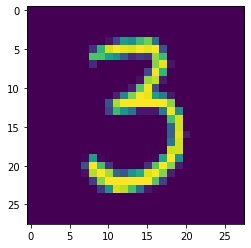

In [9]:
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
X = training_images
X=X.reshape(-1,28,28,1)
plt.imshow(X[50,:,:,0])


# Using Shallow Neural Network(NN)

In [4]:
def train_mnist():
    
    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy') > 0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True
    callbacks = myCallback()            
    

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    
    x_train = x_train/255
    x_test  = x_test/255
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting,training
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    
    # Evaluate on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(test_acc)
    
    return history.epoch, history.history['accuracy'][-1]

In [5]:
train_mnist()

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2003 - accuracy: 0.9406
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0807 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0524 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9879
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9909
Reached 99% accuracy so cancelling training!
313/313 [==============================] - 1s 1ms/step - loss: 0.0841 - accuracy: 0.9765
0.9764999747276306


([0, 1, 2, 3, 4], 0.9908666610717773)

## Using Convolutional Neural Network(CNN)

We can improve the MNIST accuracy using CNN easily rather than using DNN.

In CNN, we are training a model that trains to 99.8% accuracy or above with simple CNN architecture.

In [6]:
def train_mnist_conv():

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.998):
                print("\nReached 99.8% accuracy so cancelling training!")
                self.model.stop_training = True
                
    # load the dataset
    
    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
    
    # Normalizing
    
    # If u want to train over subset of the total training data
    # training_images = training_images[:3000]
    # training_labels = training_labels[:3000]
    training_images=training_images.reshape(-1, 28, 28, 1)
    training_images=training_images / 255.0
    
    test_images = test_images.reshape(10000, 28, 28, 1)
    test_images = test_images / 255.0
    
    callbacks = myCallback()
    
    
    # defining the conv model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # model fitting, training the model
    history = model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])
    
    # Evaluate on the test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(test_acc)

    return history.epoch, history.history['accuracy'][-1]



In [7]:
_, _ = train_mnist_conv()

Epoch 1/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1128 - accuracy: 0.9653
Epoch 2/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0390 - accuracy: 0.9880
Epoch 3/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0268 - accuracy: 0.9916
Epoch 4/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0189 - accuracy: 0.9938
Epoch 5/20
1875/1875 [==============================] - 52s 27ms/step - loss: 0.0127 - accuracy: 0.9957
Epoch 6/20
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 7/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0091 - accuracy: 0.9968
Epoch 8/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 9/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 10/20
1874/1875 [============================>.] - ETA: 0s

We can observe the outputs and the differences in two models training and test accuracy in outputs sections of the models. 